1. For the first step we import the libraries that are neede to our process :  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. we read our csv file form related directory and create dataframe as the first step of processing data : 

In [2]:
csv_file = pd.read_csv('D:/other/python/IMT/first project/England-Weather/EnglandWeather.csv')
initial_df = pd.DataFrame(csv_file)
initial_df

,Formatted Date,Summary,Precip Type,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,14.1197,1015.13,0.89
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,14.2646,1015.63,0.86
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,3.9284,1015.94,0.89
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,14.1036,1016.41,0.83
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,11.0446,1016.51,0.83
...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,10.9963,1014.36,0.43
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,10.0947,1015.16,0.48
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,8.9838,1015.66,0.56
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,10.5294,1015.95,0.60


3. In our dataset we have columns that contain both strings and numbers so to have a better understanding of the data it's better to separate them from each other and also it's better to delete the none value rows from our initial dataset :

In [3]:
clear_df = initial_df.dropna()
string_df = pd.DataFrame(clear_df,columns=['Formatted Date','Summary','Precip Type'])
digit_df = pd.DataFrame(clear_df,columns=['Temperature (C)','Wind Speed (km/h)','Pressure (millibars)','Humidity'])
print(string_df)
print(digit_df)

                      Formatted Date        Summary Precip Type
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain
...                              ...            ...         ...
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain

[95936 rows x 3 columns]
       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)  Humidity
0             9.472222            14.1197               1015.13      0.89
1             9.355556            14.2646               10

4. After clearing and separating the data we describe both data frames to detect the process of analyzing the data : 

In [4]:
print(string_df.describe(include='all'))
print('\n')
print(digit_df.describe(include='all'))

                       Formatted Date        Summary Precip Type
count                           95936          95936       95936
unique                          95912             27           2
top     2010-08-02 08:00:00.000 +0200  Partly Cloudy        rain
freq                                2          31635       85224


       Temperature (C)  Wind Speed (km/h)  Pressure (millibars)      Humidity
count     95936.000000       95936.000000          95936.000000  95936.000000
mean         11.940976          10.804936           1003.150038      0.734841
std           9.570671           6.920727            117.276976      0.195724
min         -21.822222           0.000000              0.000000      0.000000
25%           4.604167           5.796000           1011.890000      0.600000
50%          12.033333           9.933700           1016.420000      0.780000
75%          18.844444          14.135800           1021.050000      0.890000
max          39.905556          63.852600        

5.In the next steps we consider the "Humidity" as our goal and try to compare the different features with the "humidity" with the different types of the charts : 

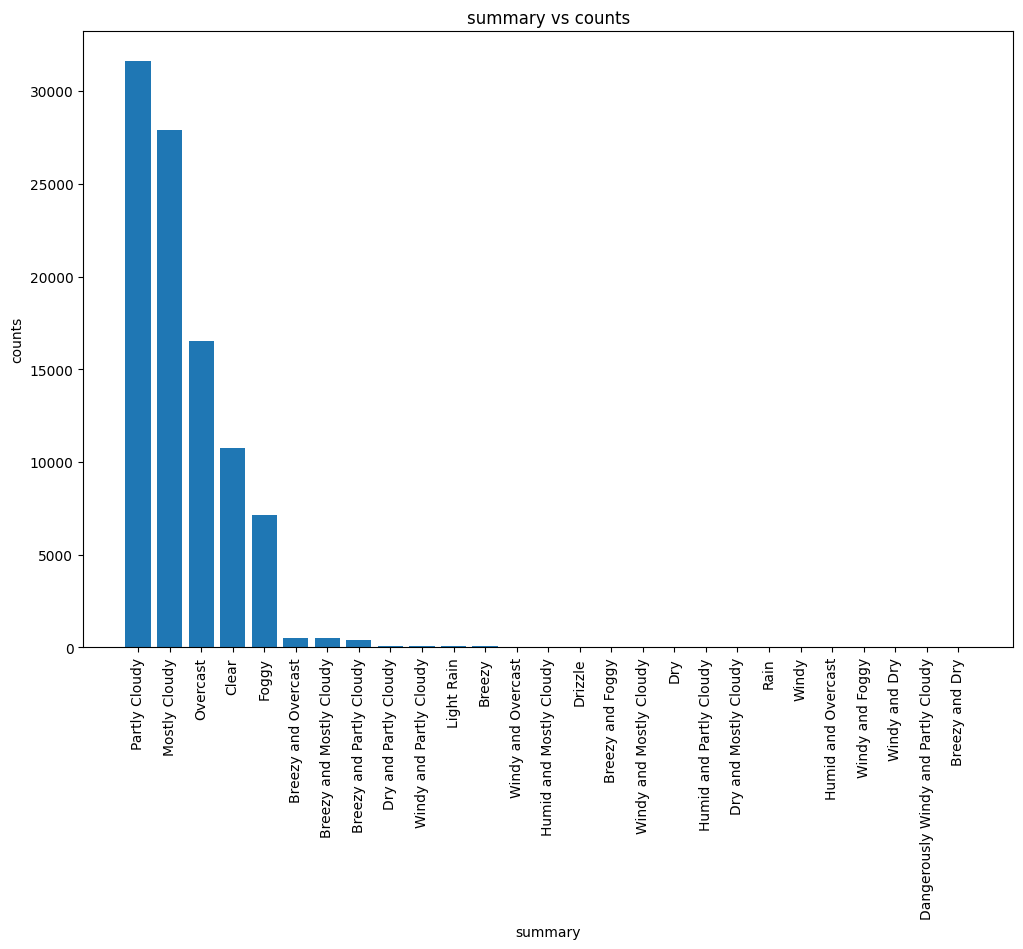

In [12]:
summary_count = clear_df['Summary'].value_counts()
plt.figure(figsize=(12,8))
plt.bar(summary_count.index,summary_count.values)
plt.xlabel('summary')
plt.ylabel('counts')
plt.title('summary vs counts')
plt.xticks(rotation = 90)
plt.savefig('D:/other/python/IMT/first project/England-Weather/fig_1.png')
plt.show()

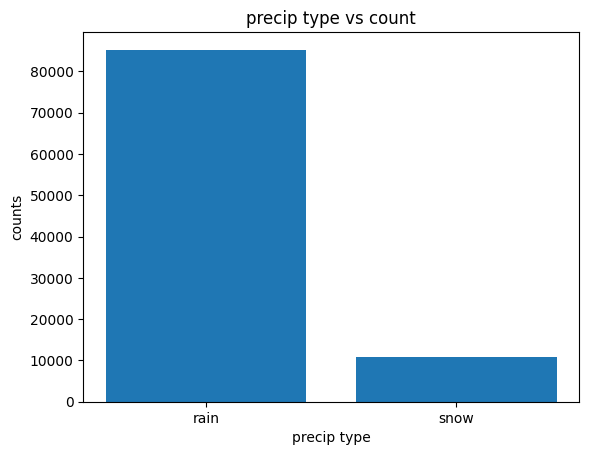

In [13]:
type_count = clear_df['Precip Type'].value_counts()
plt.bar(type_count.index,type_count.values)
plt.xlabel('precip type')
plt.ylabel('counts')
plt.title('precip type vs count')
plt.savefig('D:/other/python/IMT/first project/England-Weather/fig_2.png')
plt.show()

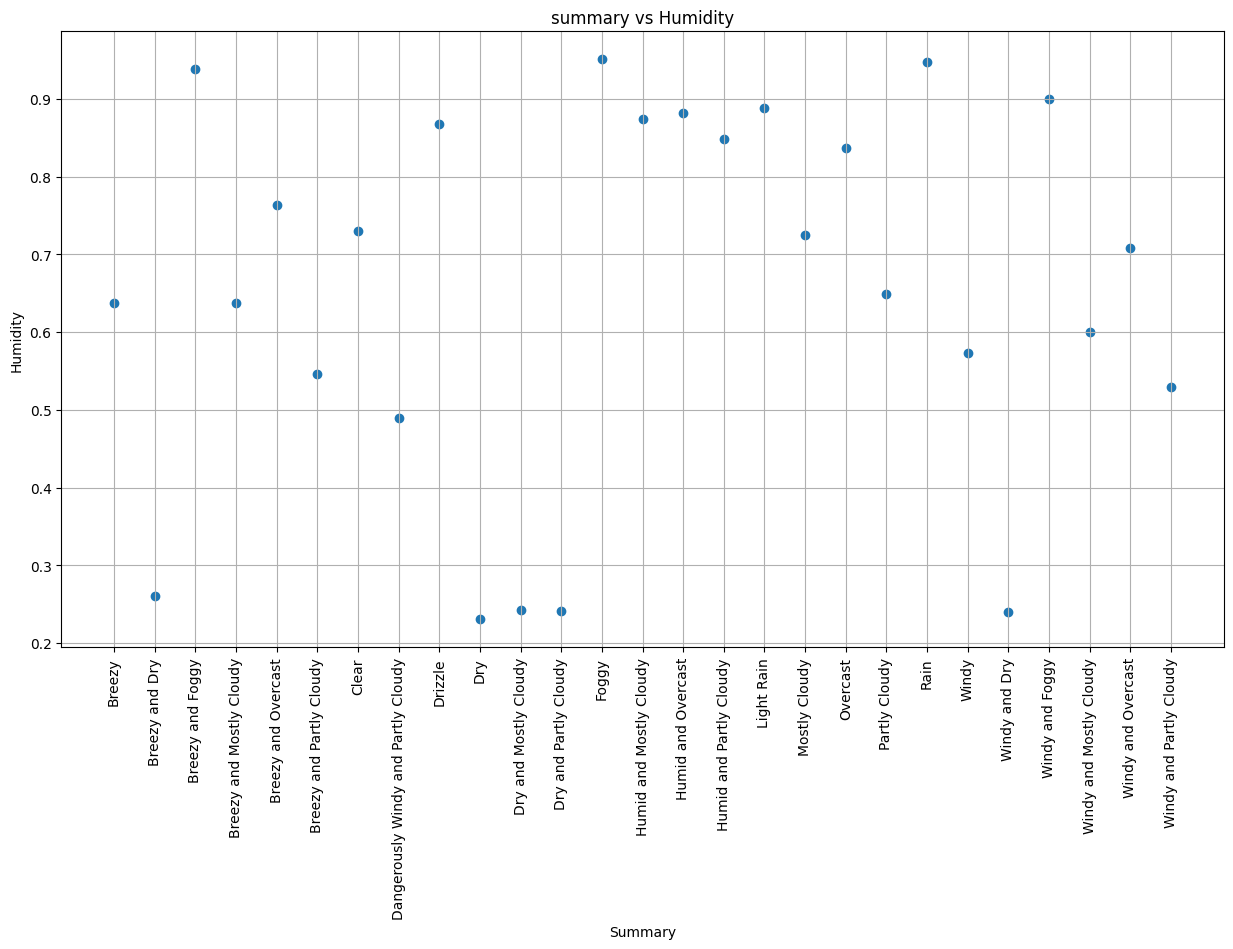

In [14]:
summary_humidity = initial_df.groupby('Summary')['Humidity'].mean().reset_index()
plt.figure(figsize=(15,8))
plt.scatter(summary_humidity['Summary'],summary_humidity['Humidity'])
plt.xlabel('Summary')
plt.ylabel('Humidity')
plt.title('summary vs Humidity')
plt.xticks(rotation = 90)
plt.grid()
plt.savefig('D:/other/python/IMT/first project/England-Weather/fig_3.png')
plt.show()

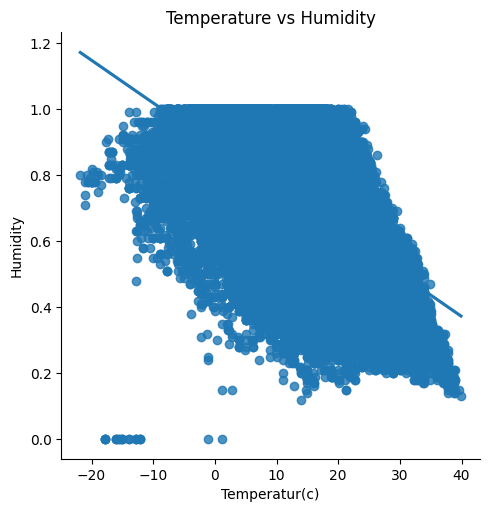

In [15]:
sns.lmplot(x='Temperature (C)',y ='Humidity',data=clear_df)
plt.xlabel('Temperatur(c)')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
plt.savefig('D:/other/python/IMT/first project/England-Weather/fig_4.png')
plt.show()

d:\other\python\IMT\first project\England-Weather\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\other\python\IMT\first project\England-Weather\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\other\python\IMT\first project\England-Weather\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\other\python\IMT\first project\England-Weather\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

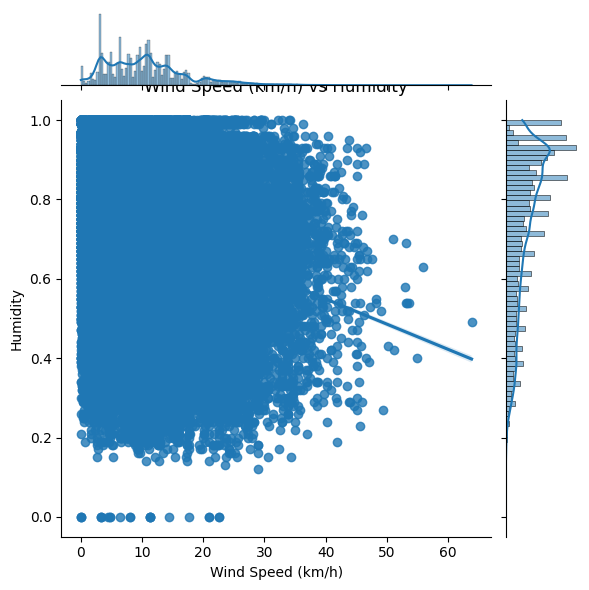

In [16]:
sns.jointplot(x='Wind Speed (km/h)', y='Humidity', data=clear_df, kind='reg')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Humidity')
plt.title('Wind Speed (km/h) vs Humidity')
plt.savefig('D:/other/python/IMT/first project/England-Weather/fig_5.png')
plt.show()

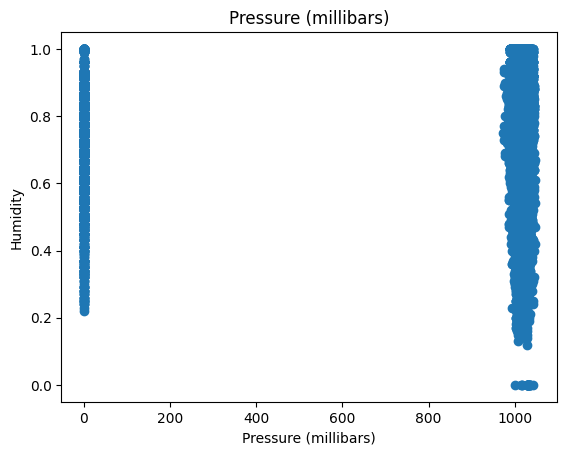

In [17]:
plt.scatter(clear_df['Pressure (millibars)'],clear_df['Humidity'])
plt.xlabel('Pressure (millibars)')
plt.ylabel('Humidity')
plt.title('Pressure (millibars)')
plt.savefig('D:/other/python/IMT/first project/England-Weather/fig_6.png')
plt.show()

6. In our dataset we have date columns, so our dataset is time series and now we want to consider this fact and analyze our dataset in time series way :  

C:\Users\sina tavakoli\AppData\Local\Temp\ipykernel_8156\2126432025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clear_df['Year'] = year
d:\other\python\IMT\first project\England-Weather\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\other\python\IMT\first project\England-Weather\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\other\python\IMT\first project\Englan

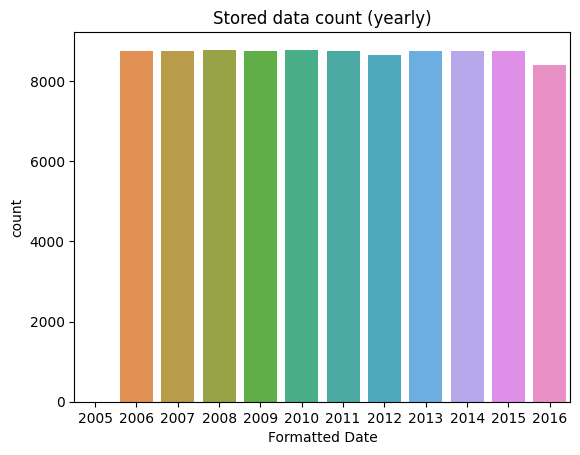

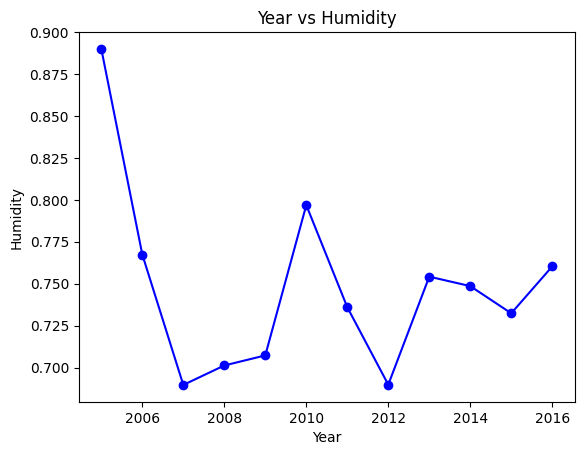

In [19]:
year = pd.to_datetime(clear_df['Formatted Date'],utc=True).dt.year
clear_df['Year'] = year
yearly_classified_df = clear_df.groupby('Year')['Humidity'].mean().reset_index()
sns.countplot(x=year)
plt.title('Stored data count (yearly)')
plt.savefig('D:/other/python/IMT/first project/England-Weather/fig_7.png')
plt.show()
plt.plot(yearly_classified_df['Year'], yearly_classified_df['Humidity'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Humidity')
plt.title('Year vs Humidity')
plt.savefig('D:/other/python/IMT/first project/England-Weather/fig_8.png')
plt.show()